In [1]:
import axelrod as axl

In [3]:
import pandas as pd

from keras.models import load_model

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
from keras.models import Sequential

In [7]:
from keras.layers import (
    LSTM,
    Bidirectional,
    CuDNNLSTM,
    Dense,
    Dropout,
    RepeatVector,
    TimeDistributed,
)

In [8]:
from keras.layers.embeddings import Embedding

**Padded classification**

In [9]:
num_cells = 100
drop_out_rate = 0.2

top_words = 3
embedding_vector_length = 1
max_length = 204

In [11]:
model = Sequential()

model.add(
    Embedding(top_words, embedding_vector_length, input_length=max_length)
)
model.add(Bidirectional(LSTM(num_cells)))

model.add(Dropout(rate=drop_out_rate))
model.add(Dense(1, activation="sigmoid"))

model.load_weights('hawk_output/output_padded/weights-over-time.h5')

model.compile(
    loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"]
)

In [12]:
input_lenght = 204

In [13]:
test_input  = np.array([2, 2, 2, 2, 2, 2, 2, 2, 2] + [0 for _ in range(input_lenght - 9)] )
test_input = test_input.reshape((1, input_lenght))

In [14]:
output = model.predict(test_input)

In [15]:
axl.Action(round(output.max()))

D

In [16]:
valid = pd.read_csv('hawk_output/output_padded/validation_measures_64_1.csv',
                    index_col=0)

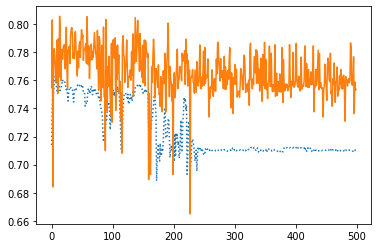

In [17]:
plt.plot(valid['acc'], ':')
plt.plot(valid['val_acc']);

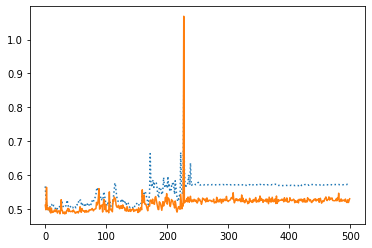

In [18]:
plt.plot(valid['loss'], ':')
plt.plot(valid['val_loss']);

In [15]:
from axelrod.random_ import random_choice

C, D = axl.Action.C, axl.Action.D

class LSTMPlayer(axl.Player):
    name = "The LSTM homie"
    classifier = {
        "memory_depth": float("inf"),
        "stochastic": False,
        "inspects_source": False,
        "manipulates_source": False,
        "manipulates_state": False,
    }

    def __init__(self, model, reshape_history_funct, opening_probability=0.70, input_length=False):
        self.model = model
        self.opening_probability = opening_probability
        self.reshape_history_function = reshape_history_funct
        if input_length:
            self.input_length = input_length
        super().__init__()

    def strategy(self, opponent):
        if len(self.history) == 0:
            return random_choice(self.opening_probability)

        current_length = len(opponent.history)
        history = [action.value for action in opponent.history]

        prediction = self.model.predict(self.reshape_history_function(history, self.input_length))
    

        return axl.Action(round(prediction.max()))

    def __repr__(self):
        return self.name

In [16]:
def reshape_history_padded_model(history, input_length):

    length_history = len(history)
    history = np.where(np.array(history)==0, 2, history)
    
    if length_history > input_length:
        inputs = np.array(history[-input_length:])
    else:
        inputs = np.append(history, np.zeros((input_length - length_history, 1)))
    
    assert len(inputs) == input_length
    
    return np.array(inputs).reshape(1, len(inputs))

**Match**

In [20]:
player = LSTMPlayer(model, reshape_history_padded_model, input_length=204)

In [21]:
match = axl.Match([player, axl.Grudger()], turns=205)

In [22]:
_ = match.play()

In [23]:
match.result

[(D, C),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (C, D),
 (C, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (C, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (C, D),
 (C, D),
 (D, D),
 (D, D),
 (D, D),
 (C, D),
 (C, D),
 (D, D),
 (D, D),
 (C, D),
 (C, D),
 (C, D),
 (D, D),
 (D, D),
 (C, D),
 (C, D),
 (D, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (D, D),
 (C, D),
 (C, D),
 (D, D),
 (D, D),
 (C, D),
 (C, D),
 (D, D),
 (D, D),
 (D, D),
 (C, D),
 (D, D),
 (C, D),
 (D, D),
 (D, D),
 (C, D),
 (D, D),
 (D, D),
 (D, D),
 (C, D),
 (C, D),
 (D, D),
 (D, D),
 (D, D),
 (C, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (D, D),
 (D, D),
 (C, D),
 (D, D),
 (D, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (C, D),
 (C, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (C, D),
 (D, D),
 

**classification**

In [49]:
model = Sequential()

model.add(
        LSTM(
            100, return_sequences=True, input_shape=(None, 1)
        )
    )

model.add(Dropout(rate=drop_out_rate))

model.add(Dense(1, activation="sigmoid"))

In [50]:
model.load_weights('hawk_output/output_lstm/weights-over-time.h5')

In [51]:
test_input  = np.array([0, 1, 2])
test_input = test_input.reshape((1, 3, 1))

In [52]:
model.predict(test_input)[0][-1]

array([0.8135053], dtype=float32)

In [53]:
def reshape_history_lstm_model(history):
    return np.array(history).reshape(1, len(history), 1)

In [54]:
from axelrod.random_ import random_choice

C, D = axl.Action.C, axl.Action.D

class LSTMPlayer(axl.Player):
    name = "The LSTM homie"
    classifier = {
        "memory_depth": float("inf"),
        "stochastic": False,
        "inspects_source": False,
        "manipulates_source": False,
        "manipulates_state": False,
    }

    def __init__(self, model, reshape_history_funct, opening_probability=0.70):
        self.model = model
        self.opening_probability = opening_probability
        self.reshape_history_function = reshape_history_funct
        super().__init__()

    def strategy(self, opponent):
        if len(self.history) == 0:
            return random_choice(self.opening_probability)

        history = [action.value for action in opponent.history]

        prediction = self.model.predict(self.reshape_history_function(history))
    

        return axl.Action(round(prediction[0][-1][0]))

    def __repr__(self):
        return self.name

In [55]:
player = LSTMPlayer(model , reshape_history_lstm_model)

In [56]:
match = axl.Match([player, axl.Grudger()], turns=5)

In [57]:
_ = match.play()

In [58]:
match.result

[(D, C), (C, D), (D, D), (D, D), (C, D)]

In [59]:
valid = pd.read_csv('hawk_output/output_lstm/validation_measures_run_100_1.csv',
                    index_col=0)

In [60]:
valid.columns

Index(['acc', 'val_acc', 'loss', 'val_loss'], dtype='object')

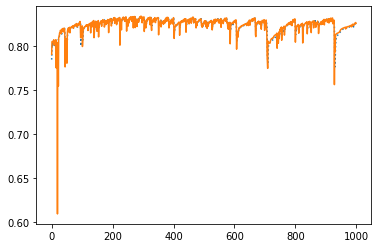

In [61]:
plt.plot(valid['acc'], ':')
plt.plot(valid['val_acc']);

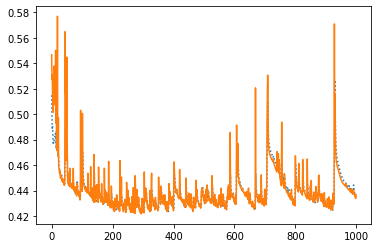

In [62]:
plt.plot(valid['loss'], ':')
plt.plot(valid['val_loss']);

In [70]:
strategies_tournament = [s() for s in axl.basic_strategies] + [player] + [axl.Random()]

In [74]:
tournament = axl.Tournament(players=strategies_tournament, turns=204, repetitions=10)

In [75]:
results = tournament.play(progress_bar=False)

//anaconda3/envs/rnn/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


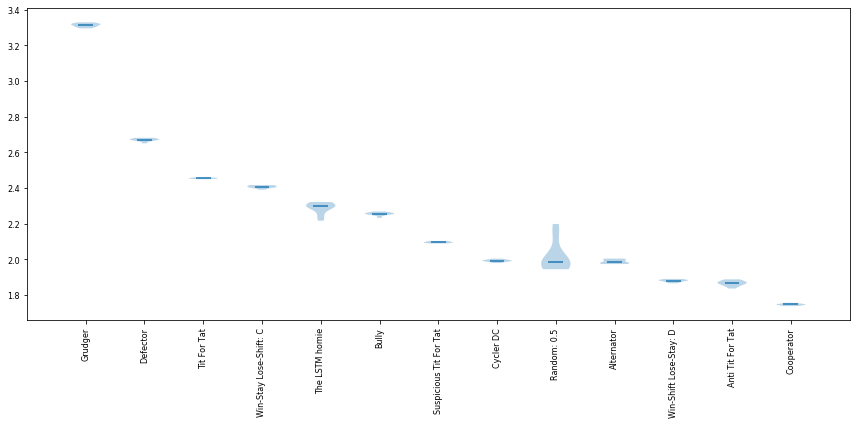

In [76]:
plot = axl.Plot(results)
p = plot.boxplot()
p.show()